In [12]:
from  matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install --upgrade openpyxl

In [11]:
#Load the dataset
xls = pd.ExcelFile('PS2data.v2.xlsx')
df1 = pd.read_excel(xls, 'household_info')
df2 = pd.read_excel(xls, 'income')
df3 = pd.read_excel(xls, 'food_consumption')
df4 = pd.read_excel(xls, 'non_food_consumption')
df5 = pd.read_excel(xls, 'gross_wealth')

# 1. Filter out male households with df1

In [13]:
#See households' info
df1

,tinh,huyen,xa,diaban,hoso,matv,m1ac2,m1ac3,m1ac5
0,101,1,3,1,13,1,2,1,73
1,101,1,3,1,13,2,2,3,39
2,101,1,3,1,13,3,2,3,33
3,101,1,3,1,14,1,1,1,64
4,101,1,3,1,14,2,2,2,53
...,...,...,...,...,...,...,...,...,...
38248,823,13,17,1,14,5,1,3,4
38249,823,13,17,1,20,1,1,1,57
38250,823,13,17,1,20,2,2,2,53
38251,823,13,17,1,20,3,1,3,23


In [14]:
# Convert all columns in df1_valid to numeric values.
df1 = df1.apply(lambda col: pd.to_numeric(col, errors='coerce'))

# Check if any non-numeric values were encountered (they become NaN).
if df1.isnull().values.any():
    print("Warning: Some values were non-numeric and have been converted to NaN.")
else:
    print("All datapoints are numeric!")

All datapoints are numeric!


In [15]:
list(df1.columns.values)

['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'm1ac2', 'm1ac3', 'm1ac5']

In [16]:
# Filter households: keep only groups where the household head (m1ac3 == 1) is male (m1ac2 == 1)
df1_filter = df1.groupby(['tinh', 'huyen', 'xa', 'hoso']).filter(
    lambda group: ((group['m1ac3'] == 1) & (group['m1ac2'] == 1)).any()
)

df1_filter

,tinh,huyen,xa,diaban,hoso,matv,m1ac2,m1ac3,m1ac5
3,101,1,3,1,14,1,1,1,64
4,101,1,3,1,14,2,2,2,53
5,101,1,3,1,14,3,1,3,22
6,101,1,3,1,15,1,1,1,61
7,101,1,3,1,15,2,2,2,60
...,...,...,...,...,...,...,...,...,...
38248,823,13,17,1,14,5,1,3,4
38249,823,13,17,1,20,1,1,1,57
38250,823,13,17,1,20,2,2,2,53
38251,823,13,17,1,20,3,1,3,23


In [17]:
# Check 2: Identify households that do not have a valid male head
invalid_households = df1_filter.groupby(['tinh', 'huyen', 'xa', 'hoso']).filter(
    lambda group: not ((group['m1ac3'] == 1) & (group['m1ac2'] == 1)).any()
)

num_invalid_households = invalid_households['hoso'].nunique()
print("Number of households with invalid head (should be 0):", num_invalid_households)

Number of households with invalid head (should be 0): 0


In [18]:
df1_filter.describe()

,tinh,huyen,xa,diaban,hoso,matv,m1ac2,m1ac3,m1ac5
count,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000
mean,452.416326,10.966563,18.588286,11.845533,14.592766,2.974272,1.486889,2.597641,31.245322
std,261.388398,8.354407,14.705318,9.813693,1.955473,1.716191,0.499836,1.350556,20.317083
min,101.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,0.000000
25%,209.000000,5.000000,7.000000,5.000000,13.000000,2.000000,1.000000,2.000000,15.000000
50%,409.000000,9.000000,15.000000,9.000000,14.000000,3.000000,1.000000,3.000000,28.000000
75%,711.000000,15.000000,27.000000,16.000000,15.000000,4.000000,2.000000,3.000000,46.000000
max,823.000000,53.000000,95.000000,105.000000,30.000000,14.000000,2.000000,9.000000,103.000000


# 2. Merge income data

In [19]:
#See income data
list(df2.columns.values)
df2 = df2[['tinh','huyen','xa','diaban','hoso','matv','m4ac11', 'm4ac12f']]

df2

,tinh,huyen,xa,diaban,hoso,matv,m4ac11,m4ac12f
0,101,1,3,1,13,1,NaN,0
1,101,1,3,1,13,2,17632.0,918
2,101,1,3,1,13,3,NaN,0
3,101,1,3,1,14,1,39528.0,2823
4,101,1,3,1,14,2,14117.0,0
...,...,...,...,...,...,...,...,...
35149,823,13,17,1,14,4,NaN,0
35150,823,13,17,1,20,1,NaN,0
35151,823,13,17,1,20,2,NaN,0
35152,823,13,17,1,20,3,31399.0,0


In [20]:
# Merge df1 and df2 on the specified columns using an inner join
merged_df_1 = pd.merge(df1_filter, df2, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv'], how='inner')
merged_df_1 = merged_df_1.rename(columns={"m1ac5": "age"})                # Change column name "m3ac11" to "income"

# Verify
merged_df_1

,tinh,huyen,xa,diaban,hoso,matv,m1ac2,m1ac3,age,m4ac11,m4ac12f
0,101,1,3,1,14,1,1,1,64,39528.0,2823
1,101,1,3,1,14,2,2,2,53,14117.0,0
2,101,1,3,1,14,3,1,3,22,NaN,0
3,101,1,3,1,15,1,1,1,61,NaN,0
4,101,1,3,1,15,2,2,2,60,39528.0,2823
...,...,...,...,...,...,...,...,...,...,...,...
27906,823,13,17,1,14,4,2,3,17,NaN,0
27907,823,13,17,1,20,1,1,1,57,NaN,0
27908,823,13,17,1,20,2,2,2,53,NaN,0
27909,823,13,17,1,20,3,1,3,23,31399.0,0


In [21]:
merged_df_1['income'] = merged_df_1['m4ac11'] + merged_df_1['m4ac12f']

merged_df_1

,tinh,huyen,xa,diaban,hoso,matv,m1ac2,m1ac3,age,m4ac11,m4ac12f,income
0,101,1,3,1,14,1,1,1,64,39528.0,2823,42351.0
1,101,1,3,1,14,2,2,2,53,14117.0,0,14117.0
2,101,1,3,1,14,3,1,3,22,NaN,0,NaN
3,101,1,3,1,15,1,1,1,61,NaN,0,NaN
4,101,1,3,1,15,2,2,2,60,39528.0,2823,42351.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27906,823,13,17,1,14,4,2,3,17,NaN,0,NaN
27907,823,13,17,1,20,1,1,1,57,NaN,0,NaN
27908,823,13,17,1,20,2,2,2,53,NaN,0,NaN
27909,823,13,17,1,20,3,1,3,23,31399.0,0,31399.0


In [22]:
# Sum up total household income
household_income = (
    merged_df_1
    .groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['income']
    .sum()
    .reset_index(name='total_income')
)

# Get the age of the household head (m1ac3 = 1)
head_age = (
    merged_df_1[merged_df_1['m1ac3'] == 1]      # keep only rows for household heads
    .groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['age']
    .first()
    .reset_index(name='head_age')
)

# Merge total income with head's age (which is now household age)
household_income = pd.merge(
    household_income,
    head_age,
    on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'],
    how='left'
)

# Check the new dataset
household_income

,tinh,huyen,xa,diaban,hoso,total_income,head_age
0,101,1,3,1,14,56468.0,64
1,101,1,3,1,15,42351.0,61
2,101,1,9,19,15,0.0,50
3,101,1,9,19,20,47203.0,50
4,101,1,15,50,13,163382.0,35
...,...,...,...,...,...,...,...
6936,823,13,12,25,15,27677.0,78
6937,823,13,12,25,19,0.0,32
6938,823,13,17,1,13,0.0,57
6939,823,13,17,1,14,0.0,45


## 3. Merge food consumption data


In [23]:
#See food consumption data
list(df3.columns.values)

df3 = df3[['tinh',
 'huyen',
 'xa',
 'diaban',
 'hoso',
 'm5a2c6']]

df3

,tinh,huyen,xa,diaban,hoso,m5a2c6
0,101,1,3,1,13,345.6
1,101,1,3,1,13,380.4
2,101,1,3,1,13,230.4
3,101,1,3,1,13,22.8
4,101,1,3,1,13,103.8
...,...,...,...,...,...,...
310452,823,13,17,1,20,132.0
310453,823,13,17,1,20,36.8
310454,823,13,17,1,20,38.4
310455,823,13,17,1,20,65.7


In [24]:
# Group by household-level columns and sum up the food consumption for each household
df3 = df3.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['m5a2c6'].sum().reset_index()

df3



,tinh,huyen,xa,diaban,hoso,m5a2c6
0,101,1,3,1,13,24438.8
1,101,1,3,1,14,36904.7
2,101,1,3,1,15,38741.9
3,101,1,9,19,15,17770.4
4,101,1,9,19,19,20078.0
...,...,...,...,...,...,...
9184,823,13,12,25,15,10468.8
9185,823,13,12,25,19,8964.7
9186,823,13,17,1,13,7349.5
9187,823,13,17,1,14,9983.0


In [25]:
# Merge household_income and df3 using an inner join
household_income_2 = pd.merge(household_income, df3, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='inner')
household_income_2 = household_income_2.rename(columns={"m5a2c6": "food_consumption"})

# Verify
household_income_2

,tinh,huyen,xa,diaban,hoso,total_income,head_age,food_consumption
0,101,1,3,1,14,56468.0,64,36904.7
1,101,1,3,1,15,42351.0,61,38741.9
2,101,1,9,19,15,0.0,50,17770.4
3,101,1,9,19,20,47203.0,50,22501.7
4,101,1,15,50,13,163382.0,35,51339.0
...,...,...,...,...,...,...,...,...
6936,823,13,12,25,15,27677.0,78,10468.8
6937,823,13,12,25,19,0.0,32,8964.7
6938,823,13,17,1,13,0.0,57,7349.5
6939,823,13,17,1,14,0.0,45,9983.0


# 4. Merge non-food consumption data



In [26]:
#See non-food consumption data
list(df4.columns.values)

df4 = df4[['tinh',
 'huyen',
 'xa',
 'diaban',
 'hoso',
 'm5b1c4']]

df4

,tinh,huyen,xa,diaban,hoso,m5b1c4
0,101,1,3,1,13,14.0
1,101,1,3,1,13,360.0
2,101,1,3,1,13,180.0
3,101,1,3,1,13,360.0
4,101,1,3,1,13,50.0
...,...,...,...,...,...,...
117765,823,13,17,1,20,4160.0
117766,823,13,17,1,20,180.0
117767,823,13,17,1,20,NaN
117768,823,13,17,1,20,180.0


In [27]:
# Group by household-level columns and sum up the non-food consumption for each household
df4 = df4.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['m5b1c4'].sum().reset_index()

df4


,tinh,huyen,xa,diaban,hoso,m5b1c4
0,101,1,3,1,13,7560.0
1,101,1,3,1,14,21586.0
2,101,1,3,1,15,21488.0
3,101,1,9,19,15,7012.0
4,101,1,9,19,19,8190.0
...,...,...,...,...,...,...
9184,823,13,12,25,15,1516.0
9185,823,13,12,25,19,2070.0
9186,823,13,17,1,13,911.0
9187,823,13,17,1,14,1056.0


In [28]:
# Merge household_income_2 and df4 using an inner join
household_income_3 = pd.merge(household_income_2, df4, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='inner')
household_income_3 = household_income_3.rename(columns={"m5b1c4": "non_food_consumption"})

# Verify
household_income_3

,tinh,huyen,xa,diaban,hoso,total_income,head_age,food_consumption,non_food_consumption
0,101,1,3,1,14,56468.0,64,36904.7,21586.0
1,101,1,3,1,15,42351.0,61,38741.9,21488.0
2,101,1,9,19,15,0.0,50,17770.4,7012.0
3,101,1,9,19,20,47203.0,50,22501.7,9280.0
4,101,1,15,50,13,163382.0,35,51339.0,17447.0
...,...,...,...,...,...,...,...,...,...
6936,823,13,12,25,15,27677.0,78,10468.8,1516.0
6937,823,13,12,25,19,0.0,32,8964.7,2070.0
6938,823,13,17,1,13,0.0,57,7349.5,911.0
6939,823,13,17,1,14,0.0,45,9983.0,1056.0


In [29]:
list(household_income_3.columns.values)

['tinh',
 'huyen',
 'xa',
 'diaban',
 'hoso',
 'total_income',
 'head_age',
 'food_consumption',
 'non_food_consumption']

# 5. Merge wealth data

In [30]:
#See non-food wealth data
list(df5.columns.values)

df5 = df5[['tinh',
 'huyen',
 'xa',
 'diaban',
 'hoso',
 'm6ac6']]

df5

,tinh,huyen,xa,diaban,hoso,m6ac6
0,101,1,3,1,13,NaN
1,101,1,3,1,14,NaN
2,101,1,3,1,15,NaN
3,101,1,9,19,15,NaN
4,101,1,9,19,19,NaN
...,...,...,...,...,...,...
18143,823,13,12,25,15,NaN
18144,823,13,12,25,19,45000.0
18145,823,13,17,1,13,NaN
18146,823,13,17,1,14,NaN


In [31]:
# Group by household-level columns and sum up the non-food consumption for each household
df5 = df5.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['m6ac6'].sum().reset_index()

df5


,tinh,huyen,xa,diaban,hoso,m6ac6
0,101,1,3,1,13,0.0
1,101,1,3,1,14,0.0
2,101,1,3,1,15,0.0
3,101,1,9,19,15,0.0
4,101,1,9,19,19,0.0
...,...,...,...,...,...,...
9184,823,13,12,25,15,0.0
9185,823,13,12,25,19,45000.0
9186,823,13,17,1,13,0.0
9187,823,13,17,1,14,0.0


In [32]:
# Merge household_income_3 and df5 using an inner join
household_income_4 = pd.merge(household_income_3, df5, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='inner')
household_income_4 = household_income_4.rename(columns={"m6ac6": "gross_wealth"})

# Verify
household_income_4

,tinh,huyen,xa,diaban,hoso,total_income,head_age,food_consumption,non_food_consumption,gross_wealth
0,101,1,3,1,14,56468.0,64,36904.7,21586.0,0.0
1,101,1,3,1,15,42351.0,61,38741.9,21488.0,0.0
2,101,1,9,19,15,0.0,50,17770.4,7012.0,0.0
3,101,1,9,19,20,47203.0,50,22501.7,9280.0,0.0
4,101,1,15,50,13,163382.0,35,51339.0,17447.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6936,823,13,12,25,15,27677.0,78,10468.8,1516.0,0.0
6937,823,13,12,25,19,0.0,32,8964.7,2070.0,45000.0
6938,823,13,17,1,13,0.0,57,7349.5,911.0,0.0
6939,823,13,17,1,14,0.0,45,9983.0,1056.0,0.0


In [33]:
#take total consumption
household_income_4['total_consumption'] = household_income_4['food_consumption'] + household_income_4['non_food_consumption']
household_income_4 = household_income_4.drop(columns=['food_consumption', 'non_food_consumption'])


In [34]:
# Count the number of households where gross_wealth is 0
zero_wealth_households = household_income_4[household_income_4['gross_wealth'] == 0]
num_zero_wealth_households = len(zero_wealth_households)

print(f"Number of households with gross wealth equal to 0: {num_zero_wealth_households}")


Number of households with gross wealth equal to 0: 2187


# 6. Compute G_t and plot age-specific stats

In [35]:
# Ensure total_income is positive to compute logarithms.
# Also, restrict to households where head_age is between 18 and 71.
df_filtered = household_income_4[
    (household_income_4['total_income'] > 0) &
    (household_income_4['head_age'] >= 22) &
    (household_income_4['head_age'] <= 75)
]

# Compute the average of log(total_income) for each age group (head_age) in the filtered data.
age_income = (
    df_filtered
    .groupby('head_age').agg(
        mean_log_income = ('total_income', lambda inc: np.log(inc).mean()),
        avg_consumption  = ('total_consumption', 'mean'),
        avg_wealth       = ('gross_wealth',      'mean')
    )
    .reset_index()
)

# Exponentiate the average log income to get G_t for each age group.
age_income['G_t'] = np.exp(age_income['mean_log_income'])

age_income

,head_age,mean_log_income,avg_consumption,avg_wealth,G_t
0,22,9.704755,9616.050000,0.000000,16395.386729
1,23,9.973849,14503.725000,2950.000000,21457.919779
2,24,9.998561,20347.875000,0.000000,21994.781837
3,25,10.029944,15549.488889,333.333333,22696.001873
4,26,9.743710,15067.323529,3220.588235,17046.666049
5,27,9.890273,16815.091667,16236.333333,19737.443479
6,28,10.014985,19036.750000,7446.428571,22359.024331
7,29,10.049552,16669.515385,25530.423077,23145.418234
8,30,10.021072,19595.739474,16156.842105,22495.536635
9,31,9.883493,14212.636957,16177.173913,19604.078887


In [36]:
#Check the count of households for each age
df_filtered.groupby('head_age').size().sort_values(ascending=False)

,0
head_age,
43,133
45,132
48,129
44,128
49,122
50,121
47,112
46,109
41,108


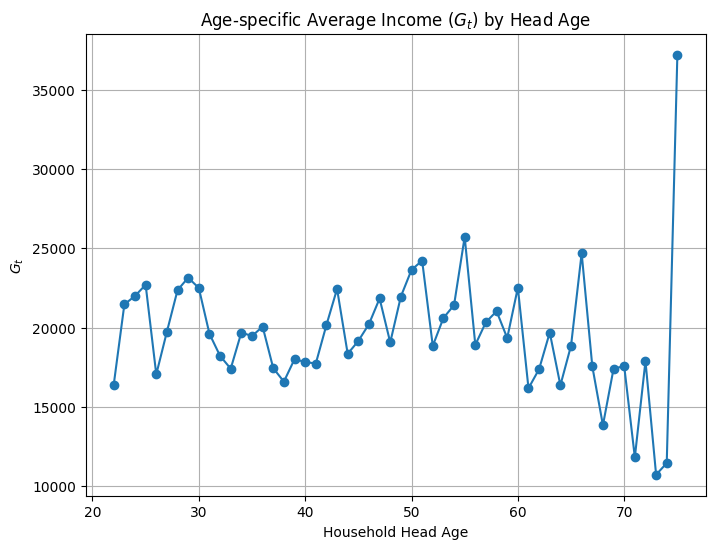

In [37]:
# Create a figure and a line plot for age_income.
plt.figure(figsize=(8, 6))
plt.plot(age_income['head_age'], age_income['G_t'], marker='o', linestyle='-')
plt.xlabel("Household Head Age")
plt.ylabel("$G_t$")
plt.title("Age-specific Average Income ($G_t$) by Head Age")
plt.grid(True)
plt.show()

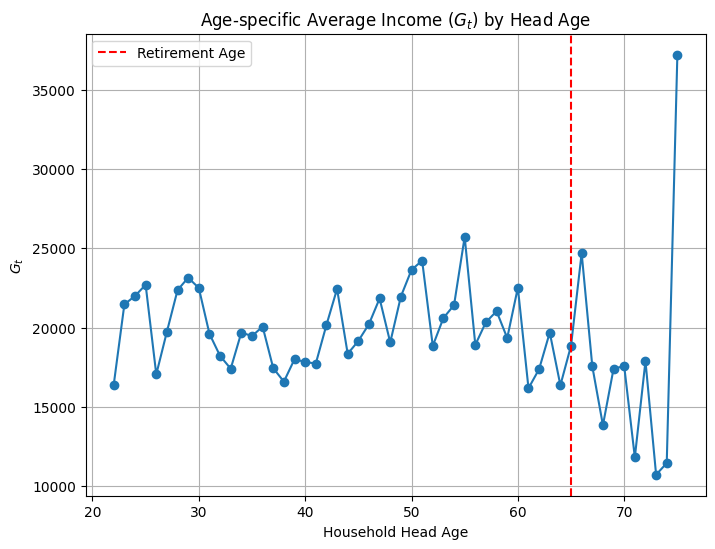

In [38]:
# Create a figure and a line plot for age_income.
plt.figure(figsize=(8, 6))
plt.plot(age_income['head_age'], age_income['G_t'], marker='o', linestyle='-')
plt.xlabel("Household Head Age")
plt.ylabel("$G_t$")
plt.title("Age-specific Average Income ($G_t$) by Head Age")
plt.axvline(x=65, color='red', linestyle='--', label='Retirement Age') #add a vertical line at age 65
plt.legend() #show the legend
plt.grid(True)
plt.savefig('age_income_plot.png')
plt.show()


In [39]:
# Save the processed G_t dataset to a CSV file.
age_income.to_csv('age_income.csv', index=False)

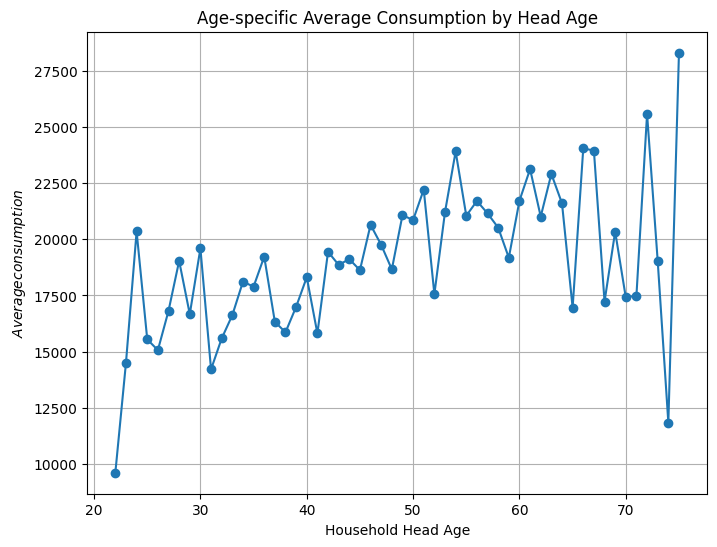

In [40]:
# Create a figure and a line plot for avg_consumption.
plt.figure(figsize=(8, 6))
plt.plot(age_income['head_age'], age_income['avg_consumption'], marker='o', linestyle='-')
plt.xlabel("Household Head Age")
plt.ylabel("$Average consumption$")
plt.title("Age-specific Average Consumption by Head Age")
plt.grid(True)
plt.show()

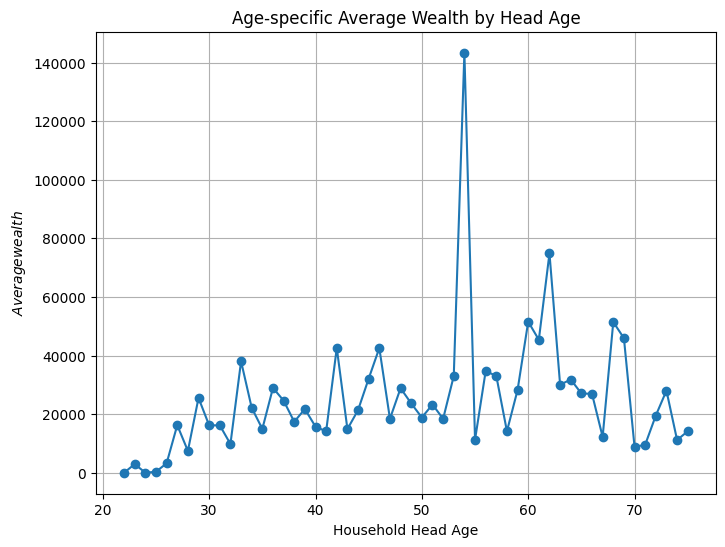

In [41]:
# Create a figure and a line plot for avg_consumption.
plt.figure(figsize=(8, 6))
plt.plot(age_income['head_age'], age_income['avg_wealth'], marker='o', linestyle='-')
plt.xlabel("Household Head Age")
plt.ylabel("$Average wealth$")
plt.title("Age-specific Average Wealth by Head Age")
plt.grid(True)
plt.show()

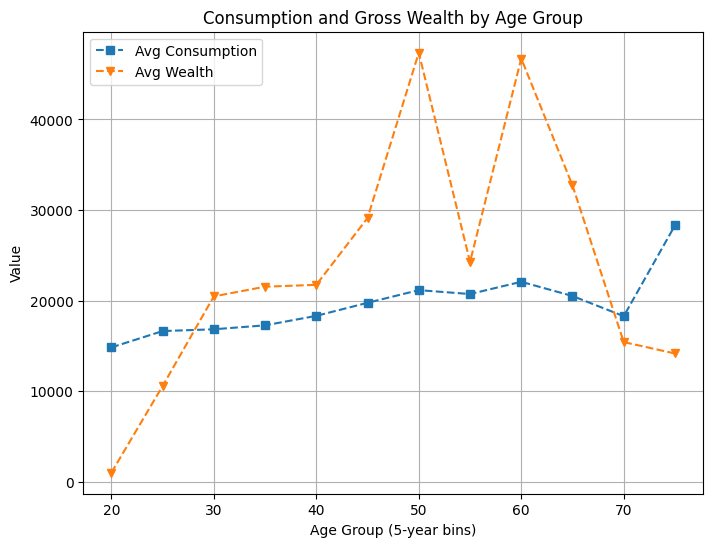

In [44]:
# 1) Create 5-year bins (e.g. 20,25,30,…)
age_income['age_group'] = (age_income['head_age'] // 5) * 5

# 2) Aggregate by those bins
age_grouped = (
    age_income
    .groupby('age_group')
    .agg(
        G_t             = ('G_t', 'mean'),
        avg_consumption = ('avg_consumption', 'mean'),
        avg_wealth       = ('avg_wealth',      'mean')

    )
    .reset_index()
)

# 3) Plot both series on one figure
plt.figure(figsize=(8, 6))
plt.plot(age_grouped['age_group'], age_grouped['avg_consumption'], marker='s', linestyle='--', label='Avg Consumption')
plt.plot(age_grouped['age_group'], age_grouped['avg_wealth'], marker='v', linestyle='--', label='Avg Wealth')
plt.xlabel("Age Group (5-year bins)")
plt.ylabel("Value")
plt.title("Consumption and Gross Wealth by Age Group")
plt.legend()
plt.grid(True)
plt.show()


In [55]:
import pandas as pd

# 1) Filter and compute ratios
df = household_income_4[
    (household_income_4['total_income'] > 0) &
    (household_income_4['head_age'].between(22,75))
].copy()

df['C_to_Y'] = df['total_consumption'] / df['total_income']
df['A_to_Y'] = df['gross_wealth']     / df['total_income']

# 2) Per-age stats
age_stats = (
    df
    .groupby('head_age')
    .agg(
        mean_C_to_Y    = ('C_to_Y', 'mean'),
        mean_A_to_Y    = ('A_to_Y', 'mean'),
        var_consumption= ('total_consumption', 'var')
    )
    .reset_index()
)
# Fill NaNs if any age has only one obs
age_stats['var_consumption'].fillna(0, inplace=True)

# 3) Collapse to a single summary row
summary_stats = pd.DataFrame({
    'AvgC_to_Y'    : [age_stats['mean_C_to_Y'].mean()],
    'AvgA_to_Y'    : [age_stats['mean_A_to_Y'].mean()],
    'AvgVarC_byAge': [age_stats['var_consumption'].mean()],
})



<ipython-input-55-3a855341d6e5>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  age_stats['var_consumption'].fillna(0, inplace=True)


In [56]:
summary_stats

,AvgC_to_Y,AvgA_to_Y,AvgVarC_byAge
0,1.135692,2.263351,2.048637e+08
